# 1. Data Exploration

In [150]:
# Import pandas,numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [108]:
# Display all rows
pd.set_option("display.max_rows",None) 
# Display all columns
pd.set_option("display.max_columns",None)

### a.  Data: "application_train.csv"

In [109]:
# Read "application_train.csv" from a folder on the local computer
application_train = pd.read_csv(r'C:\Users\YTRAN\OneDrive - Università degli Studi di Verona\Programing and Database\Project\Data\application_train.csv')

In [110]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [111]:
# The dimension of "application_train.csv"
application_train.shape

(307511, 122)

In [112]:
# The information for 60 first variables
application_train.iloc[:,0:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [113]:
# The information for the rest of variables
application_train.iloc[:,60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_MODE  157504 non-null  float64
 1   YEARS_BUILD_MODE              103023 non-null  float64
 2   COMMONAREA_MODE               92646 non-null   float64
 3   ELEVATORS_MODE                143620 non-null  float64
 4   ENTRANCES_MODE                152683 non-null  float64
 5   FLOORSMAX_MODE                154491 non-null  float64
 6   FLOORSMIN_MODE                98869 non-null   float64
 7   LANDAREA_MODE                 124921 non-null  float64
 8   LIVINGAPARTMENTS_MODE         97312 non-null   float64
 9   LIVINGAREA_MODE               153161 non-null  float64
 10  NONLIVINGAPARTMENTS_MODE      93997 non-null   float64
 11  NONLIVINGAREA_MODE            137829 non-null  float64
 12  APARTMENTS_MEDI               151450 non-nul

In [114]:
# Counting the number of null value by each columns
count_nullvalue = application_train.isna().sum(axis = 0).sort_values(ascending = False)   # sort_values: Sort a Series
count_nullvalue
#no_nullvalue[no_nullvalue > 0]

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [115]:
# Describe the basic statistical values for variables
application_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [157]:
# The correlation index of variables
application_train.corr().['TARGET']

SyntaxError: invalid syntax (1581552133.py, line 2)

In [155]:
import seaborn as sb

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

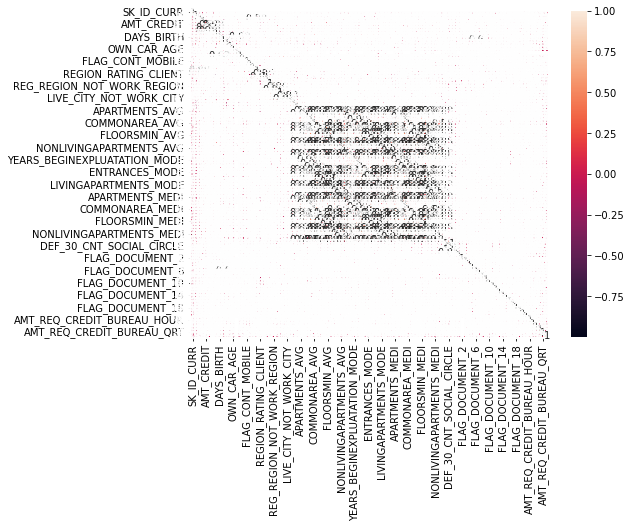

In [158]:
plt.figure(figsize=(8,6))
sb.heatmap(application_train.corr(),annot = True)

In [125]:
# Separate the kind of datatype to draw histogram charts 
application_train_float_dtype = application_train.select_dtypes("float64")
application_train_int_dtype = application_train.select_dtypes("int64")
application_train_object_dtype = application_train.select_dtypes("object")

In [139]:
application_train_float_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   OWN_CAR_AGE                   104582 non-null  float64
 7   CNT_FAM_MEMBERS               307509 non-null  float64
 8   EXT_SOURCE_1                  134133 non-null  float64
 9   EXT_SOURCE_2                  306851 non-null  float64
 10  EXT_SOURCE_3                  246546 non-null  float64
 11  APARTMENTS_AVG                151450 non-null  float64
 12  BASEMENTAREA_AVG              127568 non-nul

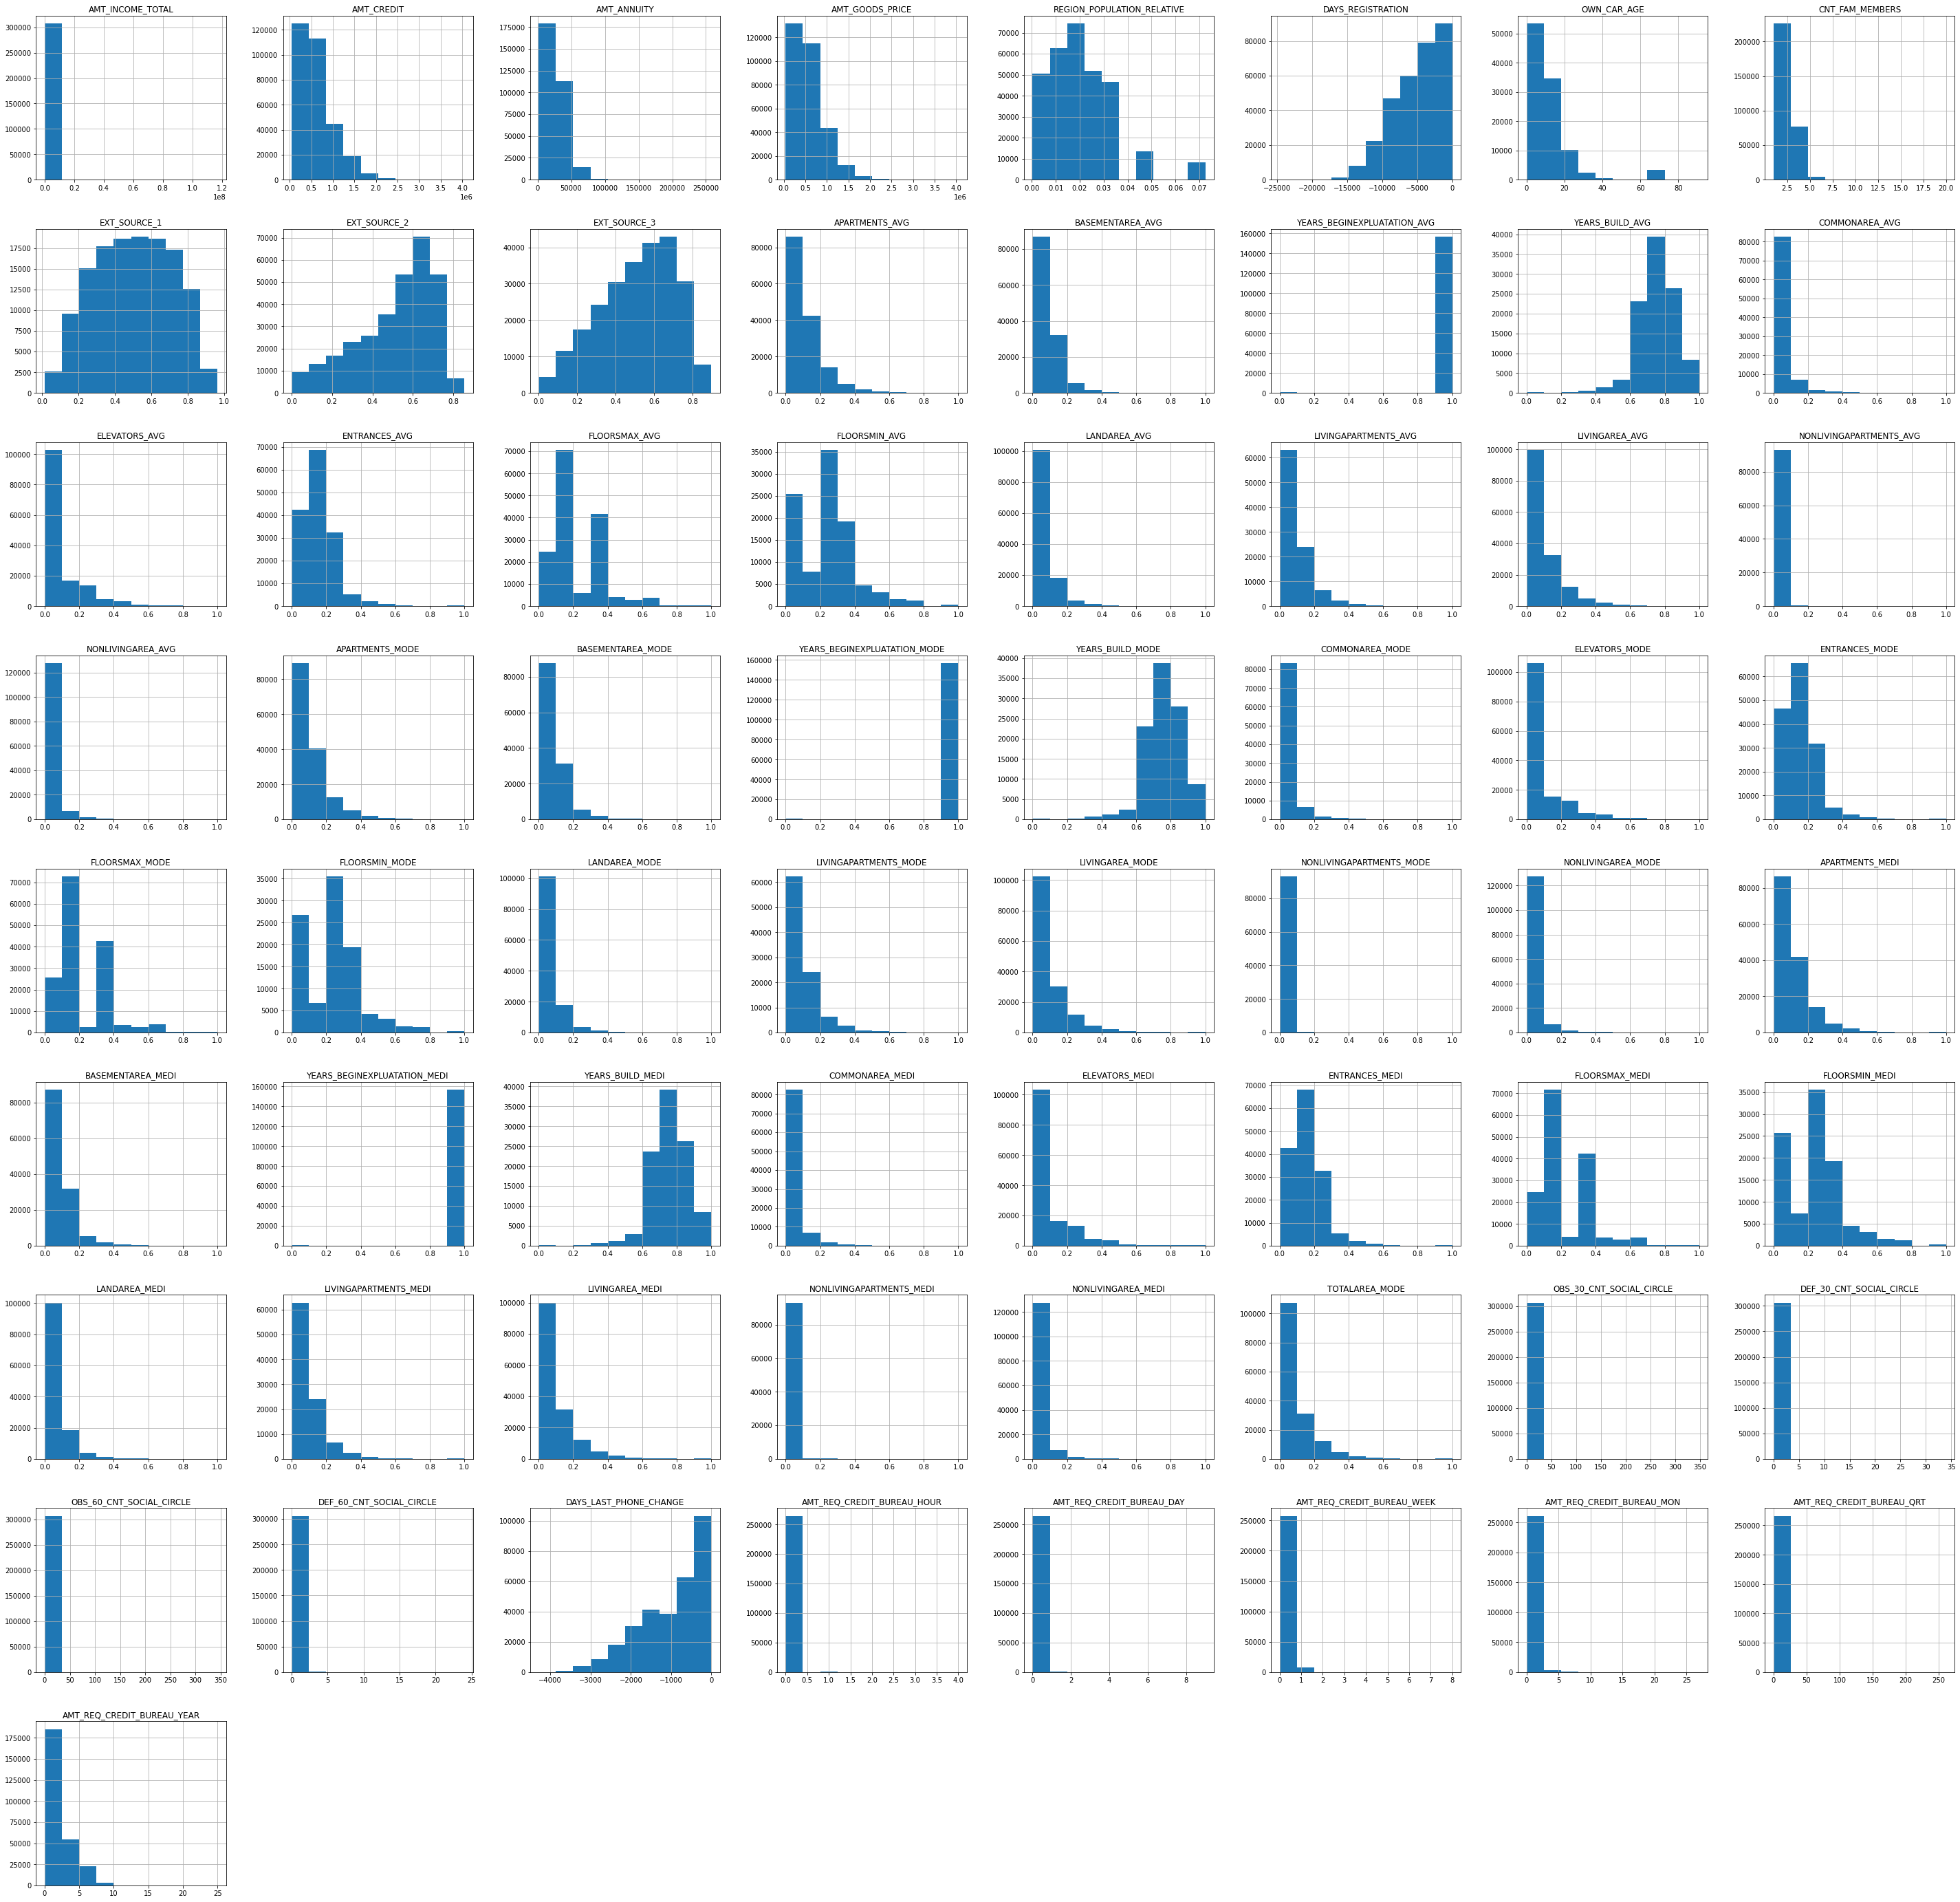

In [148]:
application_train_float_dtype.hist(figsize = (50,50)); # bin = 100

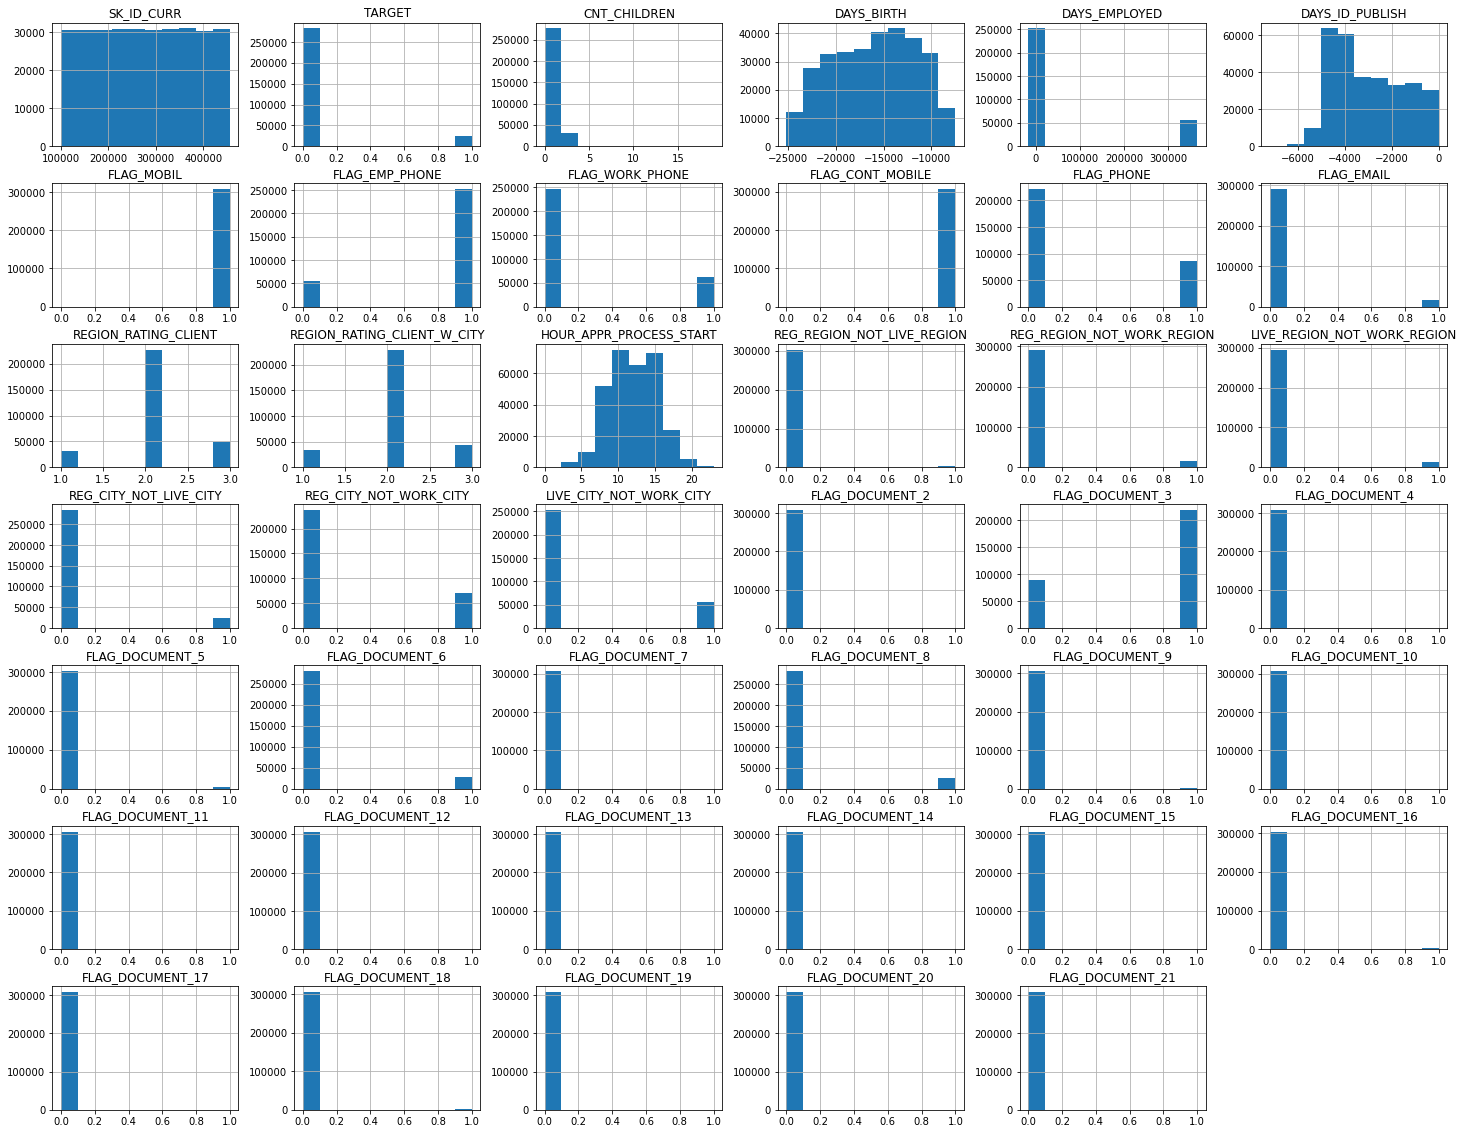

In [146]:
application_train_int_dtype.hist(figsize = (25,20));

In [153]:
application_train_object_dtype.info()
#application_train_object_dtype.hist(figsize = (25,20));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

- Columns with 'object' data type so it can not show information (count, mean, std, min ...) including: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_INCOME_TYPE, NAME_FAMILY_STATUS,NAME_HOUSING_TYPE         FLAG_OWN_REALTY, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE

In [8]:
new_application_train.describe().T.head(45)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.00000,-7479.500000,-4504.00000,-2010.000000,0.000000e+00


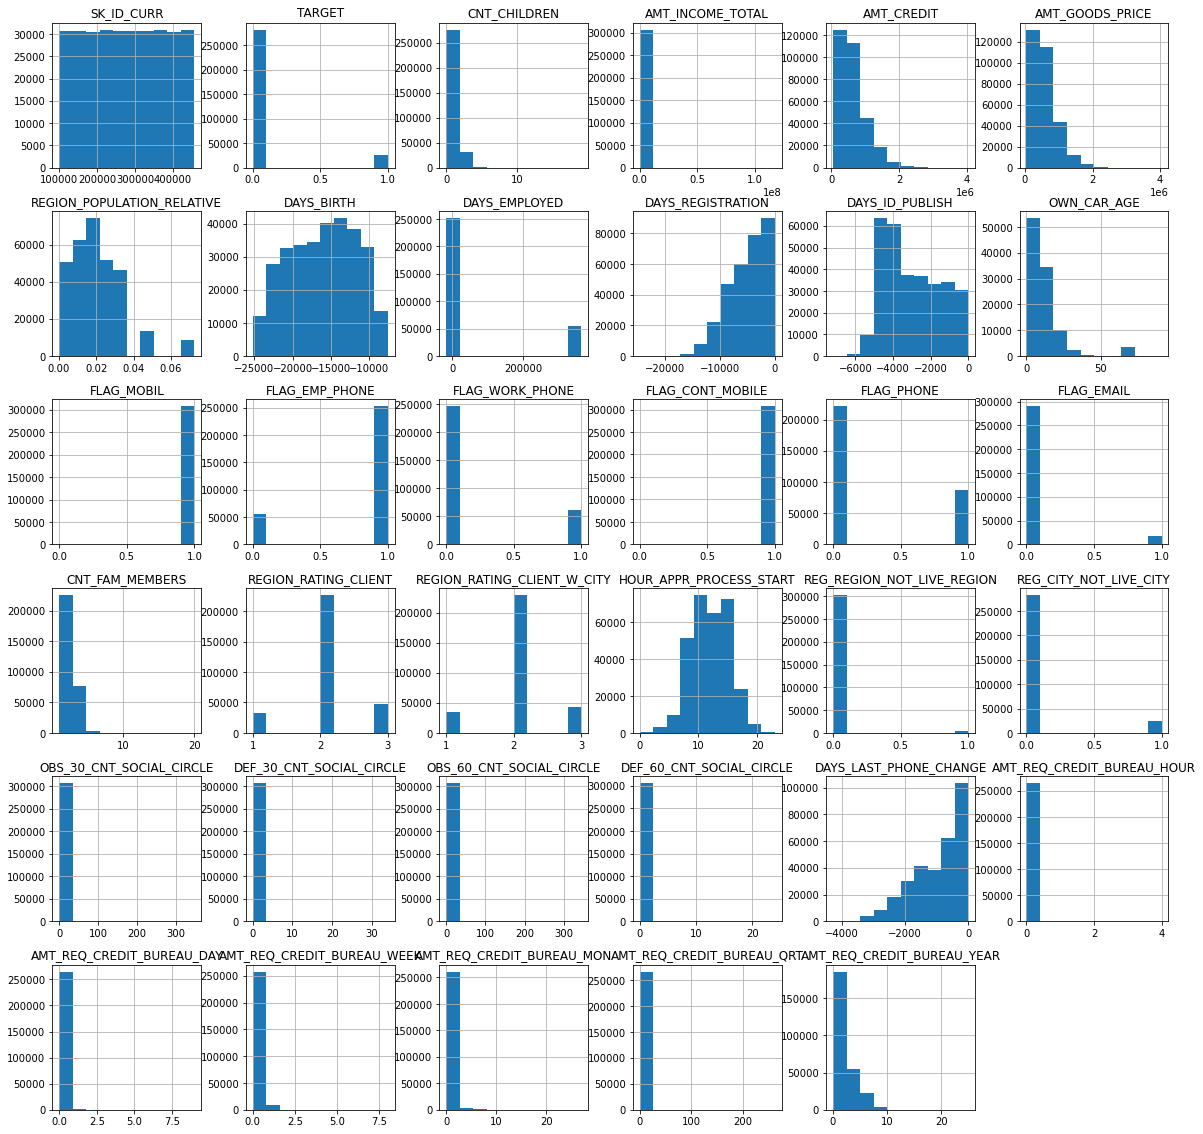

In [9]:
new_application_train.hist(figsize = (20,20))
plt.show()

In [10]:
new_application_train_2 = new_application_train[["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","NAME_INCOME_TYPE",'NAME_INCOME_TYPE', \
                       "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_OWN_REALTY", \
                      "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]]

In [12]:
new_application_train_2.hist(figsize = (20,20))

ValueError: hist method requires numerical or datetime columns, nothing to plot.

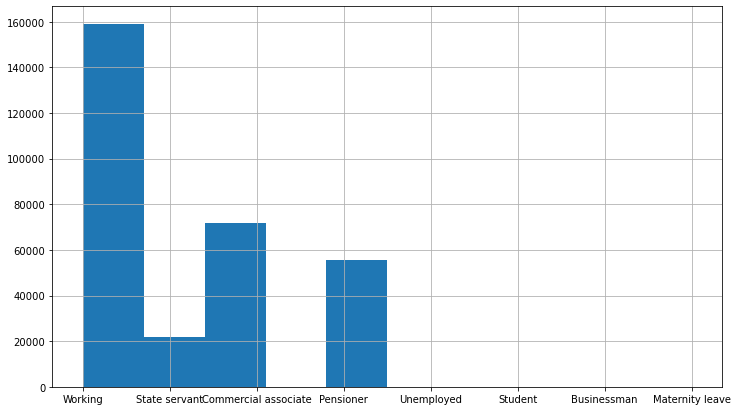

In [327]:
new_application_train["NAME_INCOME_TYPE"].hist(figsize = (12,7))
plt.show()

In [308]:
fig_hist_object_Dtype, axes = plt.subplot(4,4, figsize = (10,6))
axes[0,1].new_application_train['CODE_GENDER'].hist()
axes[0,2].new_application_train['NAME_FAMILY_STATUS'].hist()
plt.show()


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

In [270]:
#new_application_train.columns.get_loc("NAME_EDUCATION_TYPE")                                 ")        

In [288]:
new_application_train.groupby('NAME_CONTRACT_TYPE').count()

ValueError: No axis named CODE_GENDER for object type DataFrame

In [276]:
new_application_train.shape

(307511, 46)

In [282]:
#new_application_train.columns[0:10]
# housing_df['median_house_value'].hist(figsize=(12, 6), bins=100)

In [284]:
new_application_train[new_application_train.columns[0:20]].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN


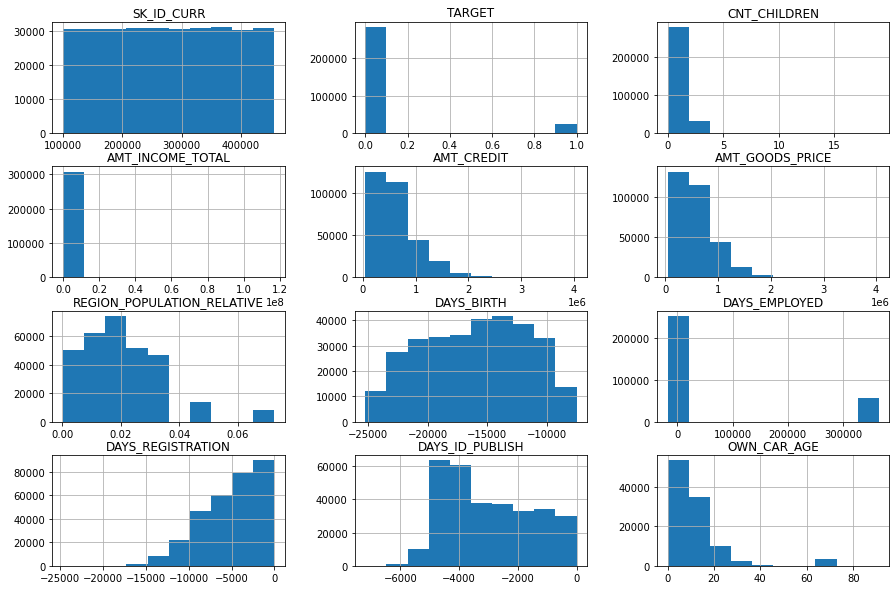

In [274]:
new_application_train[new_application_train.columns[0:20]].hist(figsize = (15,10))
plt.show()
#.hist(figsize = (25,20)) #(figsize=(12,10), bins=100)

In [273]:
# Check features/Columns have negative value mean
new_application_train[["DAYS_BIRTH","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.0,-7479.5,-4504.0,-2010.0,0.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
DAYS_LAST_PHONE_CHANGE,307510.0,-962.858788,826.808487,-4292.0,-1570.0,-757.0,-274.0,0.0


In [223]:
new_application_train[["DAYS_BIRTH","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-3648.0,-2120,-1134.0
1,-16765,-1186.0,-291,-828.0
2,-19046,-4260.0,-2531,-815.0
3,-19005,-9833.0,-2437,-617.0
4,-19932,-4311.0,-3458,-1106.0


In [202]:
# Drop "DAYS_BIRTH","DAYS_REGISTRATION","DAYS_REGISTRATION" because these columns have negative values
new_application_train = new_application_train.drop(columns = ["DAYS_BIRTH","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"], axis = 1)